# ***Data Science & HPC 3rd Project***

## ***Initializing and Importing Packages***

In [34]:
using Plots, DataFrames, StatsBase, Plots.PlotMeasures, LaTeXStrings, CSV, GLM, Flux
include("Mods.jl")
theme(:dark)
Plots.default(titlefontsize=12, tickfontsize=10, labelfontsize=12, legendfontsize=9,
    fontfamily="Computer Modern", frame=:box, label=nothing)

## ***Problem 1:***

In [35]:
SDF = CSV.read("Salary_Data.csv", DataFrame);    #=Salary DataFrame=#
#Normalizing Data:
# SDF.NormalizedYearsExperience = NormalizeFunc(SDF.YearsExperience);
# SDF.NormalizedSalary = NormalizeFunc(SDF.Salary);
#Using GLM ML functions to calculate Least Squares
OLS = lm(@formula(Salary ~ YearsExperience), SDF);
#Solving coefficient matrix
a, b = UsedFuncs.FitLine(SDF[!, 1], SDF[!, 2]);
LY = (a * SDF[!, 1]) .+ b;
#No difference between OLS and LY

L"$\Large \theta_1 = 9449.962,\quad \theta_0 = 25792.2$"

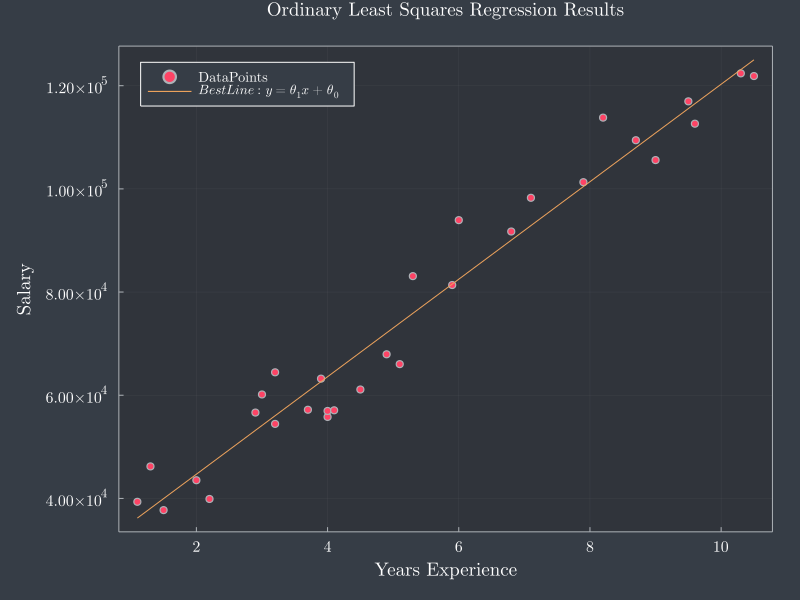

In [36]:
PLT = begin
    scatter(SDF[!,1], SDF[!,2], label = "DataPoints")
    plot!(SDF[!, 1], predict(OLS), label= L"Best Line: y = \theta_1 x + \theta_0")
    # plot!(SDF[!, 1], LY) #The answers are the same
    plot!(legend=:topleft, xlab="Years Experience", ylab="Salary",
        title="Ordinary Least Squares Regression Results",
        size=(800, 600), rightmargin=5mm, bottommargin=5mm, topmargin=5mm, leftmargin=5mm)
end
display(L"\Large \theta_1 = %$(round(coef(OLS)[2], digits = 3)),\quad \theta_0 = %$(round(coef(OLS)[1], digits = 3))")
display(PLT)

## ***Problem 2:***

In [37]:
StartupsData = CSV.read("50_Startups.csv", DataFrame)

,R&D Spend,Administration,Marketing Spend,State,Profit
,Float64,Float64,Float64,String15,Float64
1,1.65349e5,1.36898e5,4.71784e5,New York,1.92262e5
2,1.62598e5,1.51378e5,4.43899e5,California,1.91792e5
3,1.53442e5,1.01146e5,4.07935e5,Florida,1.9105e5
4,1.44372e5,1.18672e5,3.832e5,New York,182902.0
5,1.42107e5,91391.8,3.66168e5,Florida,1.66188e5
6,1.31877e5,99814.7,3.62861e5,New York,1.56991e5
7,1.34615e5,1.47199e5,1.27717e5,California,1.56123e5
8,1.30298e5,1.4553e5,3.23877e5,Florida,1.55753e5
9,1.20543e5,148719.0,3.11613e5,New York,1.52212e5


### ***Part A:***

In [38]:
ExpensesPredicts = Vector{Vector}(undef, 3)
ExpensesCoeffs = Matrix{Float64}(undef, 3, 2)
for i ∈ 1:3
    a, b = UsedFuncs.FitLine(StartupsData[!, i], StartupsData[!, end])
    LY = (a * StartupsData[!, i]) .+ b
    ExpensesCoeffs[i, :] = [a, b]
    ExpensesPredicts[i] = LY
end

L"$\Large \theta_1 = 0.8542913709388095,\quad \theta_0 = 49032.89914125211,\quad R^2 = 0.9465353160804393$"

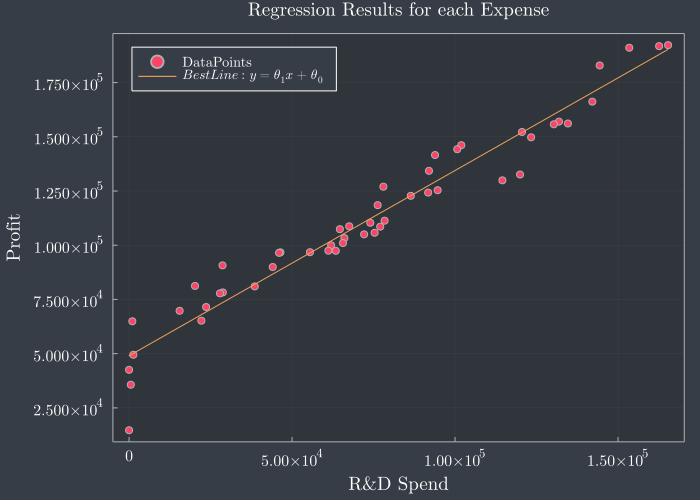

L"$\Large \theta_1 = 0.2887492023552263,\quad \theta_0 = 76974.4713054176,\quad R^2 = 0.04028714077757223$"

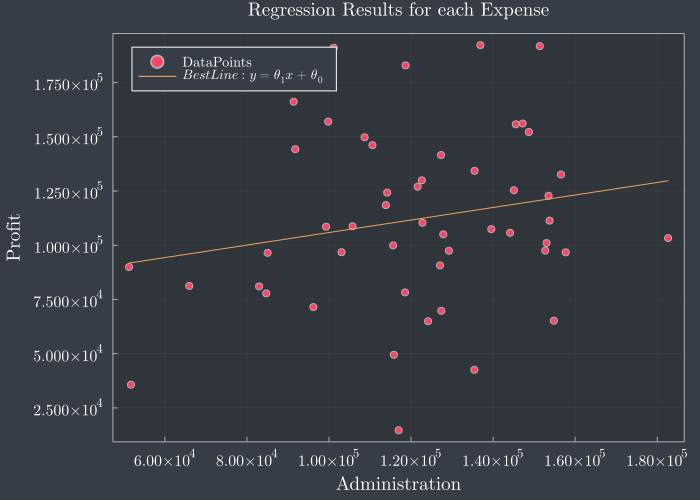

L"$\Large \theta_1 = 0.24645926444976787,\quad \theta_0 = 60003.54881577168,\quad R^2 = 0.5591535746115515$"

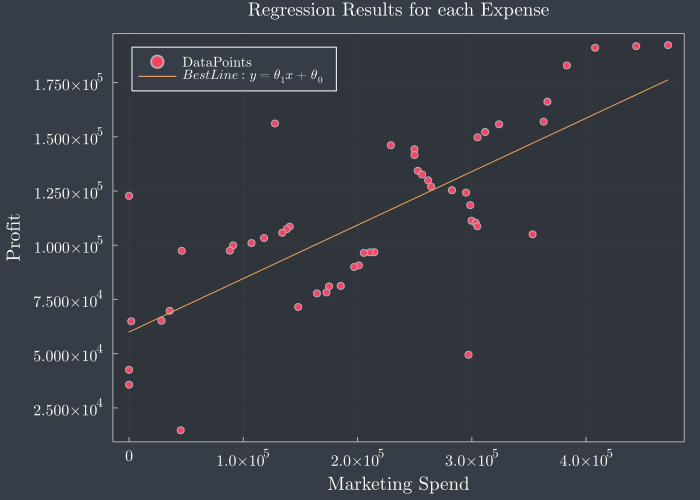

L"$\huge \text{As we can see Profit depends more on R\&D Expenses}$"

In [39]:
for i ∈ 1:3
    PLT = begin
        scatter(StartupsData[!, i], StartupsData[!, end], label = "DataPoints")
        plot!(StartupsData[!, i], ExpensesPredicts[i], label=L"Best Line: y = \theta_1 x + \theta_0")
        # plot!(SDF[!, 1], LY) #The answers are the same
        plot!(legend=:topleft, xlab=names(StartupsData)[i], ylab=names(StartupsData)[end],
            title="Regression Results for each Expense",
            size=(700, 500), rightmargin=2mm, bottommargin=2mm, topmargin=2mm, leftmargin=2mm)
    end
    CoefficientOfDetermination = UsedFuncs.R²(StartupsData[!, end], ExpensesPredicts[i])
    display(L"\Large \theta_1 = %$(ExpensesCoeffs[i, 1]),\quad \theta_0 = %$(ExpensesCoeffs[i, 2]),\quad R^2 = %$CoefficientOfDetermination")
    display(PLT)
end
display(L"\huge \text{As we can see Profit depends more on R\&D Expenses}")

### ***Part B:***

In [40]:
df = DataFrame()
df.X1 = StartupsData."R&D Spend"
df.X2 = StartupsData."Administration"
df.X3 = StartupsData."Marketing Spend"
df.Y = StartupsData."Profit"

Regress = lm(@formula(Y ~ X1), df)

display(L"\large \text{regress profit on R\&D expense:}")

display(L"f_{(X)} = x_0 . \theta_0 + x_1 . \theta_1: \quad \quad x_0 = 1,\quad
    \theta_0 = %$(round(coef(Regress)[1], digits = 3)),\quad \theta_1 = %$(round(coef(Regress)[2], digits = 3)), \quad R^2 = %$(r2(Regress))")

Regress = lm(@formula(Y ~ X1 + X2), df)

display(L"\large \text{regress profit on R\&D and Administration expenses:}")

display(L"f_{(X)} = x_0 . \theta_0 + x_1 . \theta_1 + x_2 . \theta_2: \quad \quad x_0 = 1,\quad
    \theta_0 = %$(round(coef(Regress)[1], digits = 3)),\quad \theta_1 = %$(round(coef(Regress)[2], digits = 3)),\quad
    \theta_2 = %$(round(coef(Regress)[3], digits = 3)), \quad R^2 = %$(r2(Regress))")

Regress = lm(@formula(Y ~ X1 + X2 + X3), df)

display(L"\large \text{regress profit on R\&D and Administration and Marketing Spend expenses:}")

display(L"f_{(X)} = x_0 . \theta_0 + x_1 . \theta_1 + x_2 . \theta_2 + x_3 . \theta_3: \quad \quad x_0 = 1,\quad
    \theta_0 = %$(round(coef(Regress)[1], digits = 3)),\quad \theta_1 = %$(round(coef(Regress)[2], digits = 3)),\quad
    \theta_2 = %$(round(coef(Regress)[3], digits = 3)), \quad \theta_3 = %$(round(coef(Regress)[4], digits = 3)), \quad R^2 = %$(r2(Regress))")

display(L"\textbf{It's looks like Administration expenses don't have positive effects on profit.}")

L"$\large \text{regress profit on R\&D expense:}$"

L"$f_{(X)} = x_0 . \theta_0 + x_1 . \theta_1: \quad \quad x_0 = 1,\quad
    \theta_0 = 49032.899,\quad \theta_1 = 0.854, \quad R^2 = 0.9465353160804392$"

L"$\large \text{regress profit on R\&D and Administration expenses:}$"

L"$f_{(X)} = x_0 . \theta_0 + x_1 . \theta_1 + x_2 . \theta_2: \quad \quad x_0 = 1,\quad
    \theta_0 = 54886.621,\quad \theta_1 = 0.862,\quad
    \theta_2 = -0.053, \quad R^2 = 0.9478129385009173$"

L"$\large \text{regress profit on R\&D and Administration and Marketing Spend expenses:}$"

L"$f_{(X)} = x_0 . \theta_0 + x_1 . \theta_1 + x_2 . \theta_2 + x_3 . \theta_3: \quad \quad x_0 = 1,\quad
    \theta_0 = 50122.193,\quad \theta_1 = 0.806,\quad
    \theta_2 = -0.027, \quad \theta_3 = 0.027, \quad R^2 = 0.9507459940683246$"

L"$\textbf{It's looks like Administration expenses don't have positive effects on profit.}$"

### ***Part C:***

In [41]:
Set(StartupsData."State")

Set{String15} with 3 elements:
  "California"
  "Florida"
  "New York"

In [42]:
CaliforniaData = StartupsData[findall(x -> x == "California", StartupsData."State"), :];
FloridaData = StartupsData[findall(x -> x == "Florida", StartupsData."State"), :];
NewYorkData = StartupsData[findall(x -> x == "New York", StartupsData."State"), :];

L"$\large \text{regress profit on Marketing expenses in California:}$"

L"$f_{(X)} = x_0 . \theta_0 + x_1 . \theta_1: \quad \quad x_0 = 1,\quad
    \theta_0 = 48310.637,\quad \theta_1 = 0.305, \quad R^2 = 0.6304933320585938$"

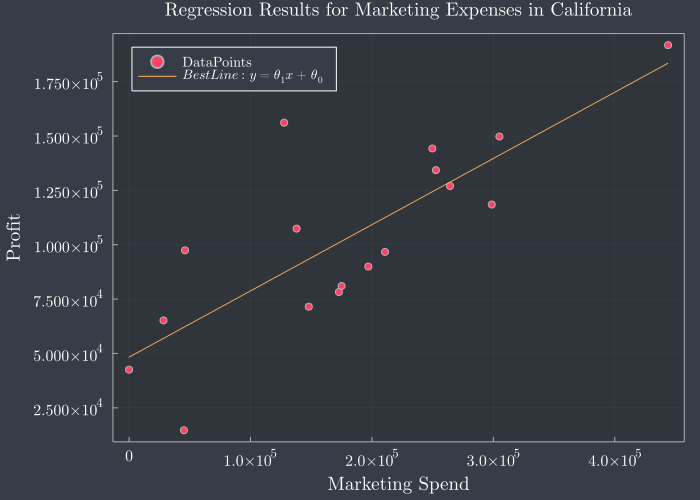

In [48]:
df = DataFrame()
df.X1 = CaliforniaData."Marketing Spend"
df.Y = CaliforniaData."Profit"

Regress = lm(@formula(Y ~ X1), df)

PLT = begin
    scatter(df.X1, df.Y, label="DataPoints")
    plot!(df.X1, predict(Regress), label=L"Best Line: y = \theta_1 x + \theta_0")
    plot!(legend=:topleft, xlab="Marketing Spend", ylab="Profit",
        title="Regression Results for Marketing Expenses in California",
        size=(700, 500), rightmargin=2mm, bottommargin=2mm, topmargin=2mm, leftmargin=2mm)
end

display(L"\large \text{regress profit on Marketing expenses in California:}")

display(L"f_{(X)} = x_0 . \theta_0 + x_1 . \theta_1: \quad \quad x_0 = 1,\quad
    \theta_0 = %$(round(coef(Regress)[1], digits = 3)),\quad \theta_1 = %$(round(coef(Regress)[2], digits = 3)), \quad R^2 = %$(r2(Regress))")

display(PLT)

L"$\large \text{regress profit on Marketing expenses in Florida:}$"

L"$f_{(X)} = x_0 . \theta_0 + x_1 . \theta_1: \quad \quad x_0 = 1,\quad
    \theta_0 = 63024.749,\quad \theta_1 = 0.225, \quad R^2 = 0.32426769289837853$"

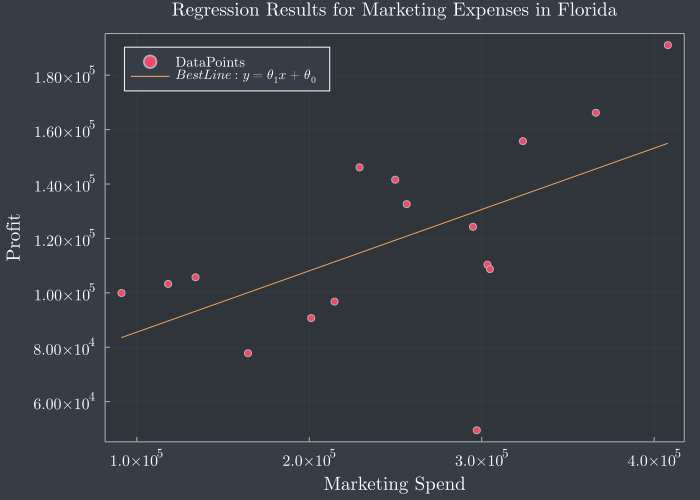

In [49]:
df = DataFrame()
df.X1 = FloridaData."Marketing Spend"
df.Y = FloridaData."Profit"

Regress = lm(@formula(Y ~ X1), df)

PLT = begin
    scatter(df.X1, df.Y, label="DataPoints")
    plot!(df.X1, predict(Regress), label=L"Best Line: y = \theta_1 x + \theta_0")
    plot!(legend=:topleft, xlab="Marketing Spend", ylab="Profit",
        title="Regression Results for Marketing Expenses in Florida",
        size=(700, 500), rightmargin=2mm, bottommargin=2mm, topmargin=2mm, leftmargin=2mm)
end

display(L"\large \text{regress profit on Marketing expenses in Florida:}")

display(L"f_{(X)} = x_0 . \theta_0 + x_1 . \theta_1: \quad \quad x_0 = 1,\quad
    \theta_0 = %$(round(coef(Regress)[1], digits = 3)),\quad \theta_1 = %$(round(coef(Regress)[2], digits = 3)), \quad R^2 = %$(r2(Regress))")

display(PLT)

L"$\large \text{regress profit on Marketing expenses in New York:}$"

L"$f_{(X)} = x_0 . \theta_0 + x_1 . \theta_1: \quad \quad x_0 = 1,\quad
    \theta_0 = 68197.236,\quad \theta_1 = 0.222, \quad R^2 = 0.6564863927840394$"

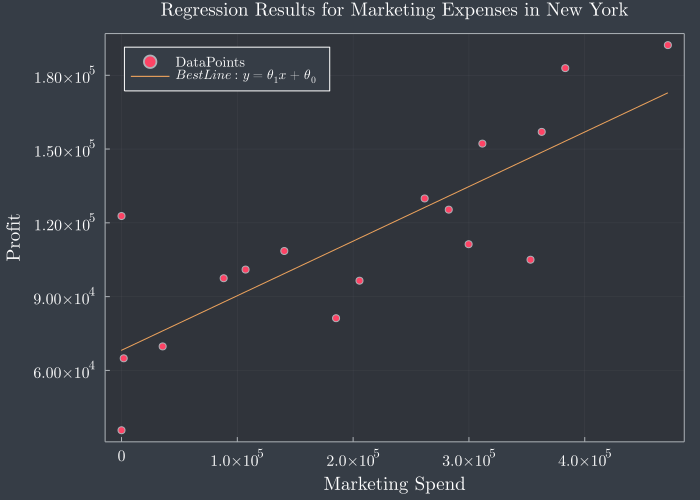

In [53]:
df = DataFrame()
df.X1 = NewYorkData."Marketing Spend"
df.Y = NewYorkData."Profit"

Regress = lm(@formula(Y ~ X1), df)

PLT = begin
    scatter(df.X1, df.Y, label="DataPoints")
    plot!(df.X1, predict(Regress), label=L"Best Line: y = \theta_1 x + \theta_0")
    plot!(legend=:topleft, xlab="Marketing Spend", ylab="Profit",
        title="Regression Results for Marketing Expenses in New York",
        size=(700, 500), rightmargin=2mm, bottommargin=2mm, topmargin=2mm, leftmargin=2mm)
end

display(L"\large \text{regress profit on Marketing expenses in New York:}")

display(L"f_{(X)} = x_0 . \theta_0 + x_1 . \theta_1: \quad \quad x_0 = 1,\quad
    \theta_0 = %$(round(coef(Regress)[1], digits = 3)),\quad \theta_1 = %$(round(coef(Regress)[2], digits = 3)), \quad R^2 = %$(r2(Regress))")

display(PLT)

## ***Problem 3:***

### ***Part A:***

In [79]:
SNAData = CSV.read("Social_Network_Ads.csv", DataFrame);
fm = @formula(Purchased ~ EstimatedSalary + Age);
logit = glm(fm, SNAData, Binomial(), ProbitLink());
ClassedPredict = round.(Int, predict(logit, SNAData));

In [90]:
SuccessRate = count(i -> SNAData.Purchased[i] == ClassedPredict[i], 1:length(ClassedPredict)) / length(ClassedPredict) * 100
TruePositive = count(i -> SNAData.Purchased[i] == 1 && ClassedPredict[i] == 1, 1:length(ClassedPredict))
TrueNegative = count(i -> SNAData.Purchased[i] == 0 && ClassedPredict[i] == 0, 1:length(ClassedPredict))
FalsePositive = count(i -> SNAData.Purchased[i] == 0 && ClassedPredict[i] == 1, 1:length(ClassedPredict))
FalseNegative = count(i -> SNAData.Purchased[i] == 1 && ClassedPredict[i] == 0, 1:length(ClassedPredict))
display(L"\text{True Positives = %$TruePositive}")
display(L"\text{True Negatives = %$TrueNegative}")
display(L"\text{False Positives = %$FalsePositive}")
display(L"\text{False Negatives = %$FalseNegative}")
display(L"\text{Success Rate = %$SuccessRate \%}")

L"$\text{True Positives = 98}$"

L"$\text{True Negatives = 239}$"

L"$\text{False Positives = 18}$"

L"$\text{False Negatives = 45}$"

L"$\text{Success Rate = 84.25 \%}$"